Import Libraries

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,fpgrowth,association_rules

Load Dataset 

In [65]:
df = pd.read_csv("Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [66]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [67]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


Check nulls

In [68]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

Check Duplicates

In [69]:
df.duplicated().sum()

np.int64(759)

Drop Duplicates

In [70]:
df = df.drop_duplicates()

In [71]:
df.duplicated().sum()

np.int64(0)

Association Rule mining

In [72]:
df2 = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()

In [73]:
# create transaction list
transactions = df2['itemDescription'].tolist()

In [74]:
transactions

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['beef', 'white bread'],
 ['frankfurter', 'curd'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['frozen meals', 'dental care'],
 ['rolls/buns'],
 ['root vegetables', 'detergent'],
 ['sausage', 'rolls/buns'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['dish cleaner', 'cling film/bags'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'shopping bags'],
 ['root vegetables', 'whole milk', 'pastry'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['other vegetables', 'hygiene articles'],
 

In [75]:
# encode
te = TransactionEncoder()
te_data = te.fit_transform(transactions)
te_data

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]],
      shape=(14963, 167))

In [76]:
encoded_df2 = pd.DataFrame(te_data,columns = te.columns_)
encoded_df2.head(10)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Create Apriori

In [77]:
frequent_items1 = apriori(encoded_df2 , min_support=0.005 , use_colnames=True) 
frequent_items1

,support,itemsets
0,0.021386,(UHT-milk)
1,0.008087,(baking powder)
2,0.033950,(beef)
3,0.021787,(berries)
4,0.016574,(beverages)
...,...,...
121,0.011629,"(soda, whole milk)"
122,0.005814,"(soda, yogurt)"
123,0.008220,"(tropical fruit, whole milk)"
124,0.005213,"(tropical fruit, yogurt)"


In [78]:
rules_ap = association_rules(frequent_items1 , metric="lift" , min_threshold=0.5)
rules_ap

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,1.0,-0.000005,0.999874,-0.000702,0.036469,-0.000126,0.101549
1,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,1.0,-0.000005,0.999968,-0.000795,0.036469,-0.000032,0.101549
2,(bottled water),(other vegetables),0.060683,0.122101,0.005480,0.090308,0.739619,1.0,-0.001929,0.965051,-0.272617,0.030908,-0.036215,0.067595
3,(other vegetables),(bottled water),0.122101,0.060683,0.005480,0.044882,0.739619,1.0,-0.001929,0.983457,-0.286230,0.030908,-0.016821,0.067595
4,(bottled water),(whole milk),0.060683,0.157923,0.007151,0.117841,0.746196,1.0,-0.002432,0.954564,-0.265842,0.033818,-0.047598,0.081561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,(whole milk),(tropical fruit),0.157923,0.067767,0.008220,0.052052,0.768108,1.0,-0.002482,0.983422,-0.263904,0.037800,-0.016857,0.086677
70,(tropical fruit),(yogurt),0.067767,0.085879,0.005213,0.076923,0.895720,1.0,-0.000607,0.990298,-0.111019,0.035119,-0.009797,0.068812
71,(yogurt),(tropical fruit),0.085879,0.067767,0.005213,0.060700,0.895720,1.0,-0.000607,0.992477,-0.112970,0.035119,-0.007580,0.068812
72,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,1.0,-0.002401,0.967861,-0.190525,0.047975,-0.033206,0.100317


Create FP-Growth

In [79]:
frequent_items2 = fpgrowth(encoded_df2 , min_support=0.005 , use_colnames=True) 
frequent_items2

,support,itemsets
0,0.157923,(whole milk)
1,0.051728,(pastry)
2,0.018780,(salty snack)
3,0.085879,(yogurt)
4,0.060349,(sausage)
...,...,...
121,0.007151,"(bottled beer, whole milk)"
122,0.005280,"(domestic eggs, whole milk)"
123,0.005614,"(newspapers, whole milk)"
124,0.007151,"(citrus fruit, whole milk)"


In [80]:
rules_fp = association_rules(frequent_items2 , metric="lift" , min_threshold=0.5)
rules_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(pastry),(whole milk),0.051728,0.157923,0.006483,0.125323,0.793571,1.0,-0.001686,0.962729,-0.215266,0.031908,-0.038714,0.083186
1,(whole milk),(pastry),0.157923,0.051728,0.006483,0.041050,0.793571,1.0,-0.001686,0.988865,-0.236006,0.031908,-0.011261,0.083186
2,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,1.0,-0.002401,0.967861,-0.190525,0.047975,-0.033206,0.100317
3,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,1.0,-0.002401,0.983638,-0.203508,0.047975,-0.016634,0.100317
4,(soda),(yogurt),0.097106,0.085879,0.005814,0.059876,0.697219,1.0,-0.002525,0.972342,-0.324769,0.032818,-0.028445,0.063790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,(whole milk),(newspapers),0.157923,0.038896,0.005614,0.035548,0.913926,1.0,-0.000529,0.996529,-0.100592,0.029360,-0.003483,0.089939
70,(citrus fruit),(whole milk),0.053131,0.157923,0.007151,0.134591,0.852259,1.0,-0.001240,0.973040,-0.154748,0.035070,-0.027707,0.089936
71,(whole milk),(citrus fruit),0.157923,0.053131,0.007151,0.045281,0.852259,1.0,-0.001240,0.991778,-0.170718,0.035070,-0.008290,0.089936
72,(pork),(whole milk),0.037091,0.157923,0.005012,0.135135,0.855703,1.0,-0.000845,0.973652,-0.149027,0.026381,-0.027061,0.083437


Visualize Comparison

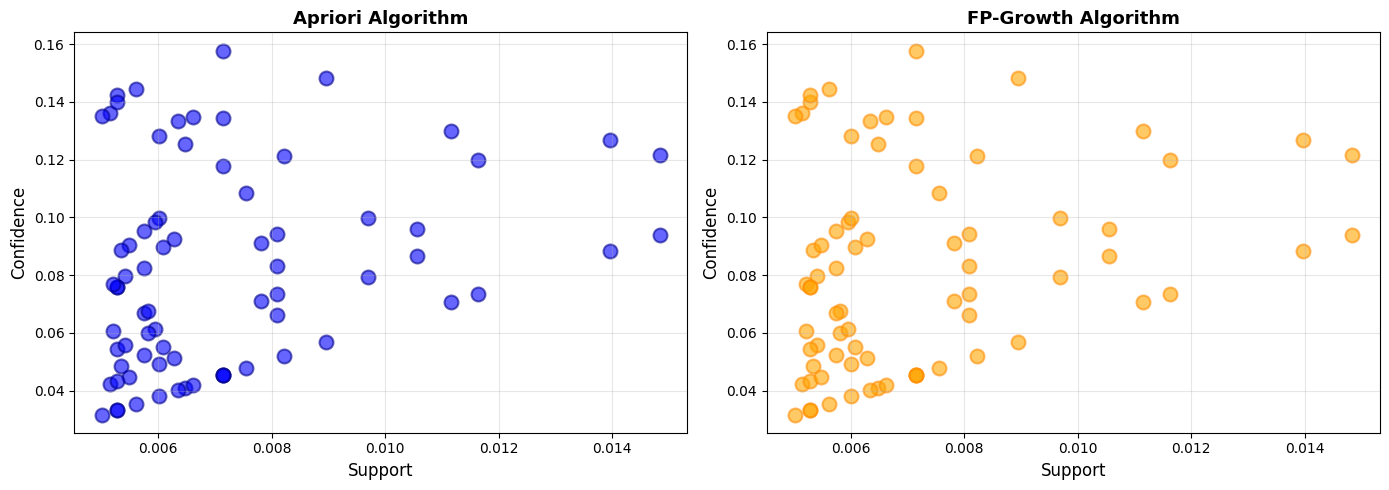


Both algorithms found 74 identical association rules.


In [88]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Apriori plot
axes[0].scatter(rules_ap['support'], rules_ap['confidence'], color='blue', alpha=0.6, s=100, edgecolor='darkblue', linewidth=1.5)
axes[0].set_xlabel("Support", fontsize=12)
axes[0].set_ylabel("Confidence", fontsize=12)
axes[0].set_title("Apriori Algorithm", fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# FP-Growth plot
axes[1].scatter(rules_fp['support'], rules_fp['confidence'], color='orange', alpha=0.6, s=100, edgecolor='darkorange', linewidth=1.5)
axes[1].set_xlabel("Support", fontsize=12)
axes[1].set_ylabel("Confidence", fontsize=12)
axes[1].set_title("FP-Growth Algorithm", fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nBoth algorithms found {len(rules_ap)} identical association rules.")